<a href="https://colab.research.google.com/github/riyan518z/notes_2/blob/main/classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv("/content/Social_Network_Ads.csv")

In [ ]:
data

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [ ]:
data.columns

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [ ]:
data['Purchased'].value_counts()

,count
Purchased,
0,257
1,143


In [ ]:
data['Purchased'].value_counts(normalize=True)

,proportion
Purchased,
0,0.6425
1,0.3575


In [ ]:
data.isna().sum()

,0
User ID,0
Gender,0
Age,0
EstimatedSalary,0
Purchased,0


In [ ]:
data = pd.get_dummies(data,dtype=np.int64)
data.head()

,User ID,Age,EstimatedSalary,Purchased,Gender_Female,Gender_Male
0,15624510,19,19000,0,0,1
1,15810944,35,20000,0,0,1
2,15668575,26,43000,0,1,0
3,15603246,27,57000,0,1,0
4,15804002,19,76000,0,0,1


In [ ]:
data

,User ID,Age,EstimatedSalary,Purchased,Gender_Female,Gender_Male
0,15624510,19,19000,0,0,1
1,15810944,35,20000,0,0,1
2,15668575,26,43000,0,1,0
3,15603246,27,57000,0,1,0
4,15804002,19,76000,0,0,1
...,...,...,...,...,...,...
395,15691863,46,41000,1,1,0
396,15706071,51,23000,1,0,1
397,15654296,50,20000,1,1,0
398,15755018,36,33000,0,0,1


In [ ]:
data.corr()

,User ID,Age,EstimatedSalary,Purchased,Gender_Female,Gender_Male
User ID,1.000000,-0.000721,0.071097,0.007120,0.025249,-0.025249
Age,-0.000721,1.000000,0.155238,0.622454,0.073741,-0.073741
EstimatedSalary,0.071097,0.155238,1.000000,0.362083,0.060435,-0.060435
Purchased,0.007120,0.622454,0.362083,1.000000,0.042469,-0.042469
Gender_Female,0.025249,0.073741,0.060435,0.042469,1.000000,-1.000000
Gender_Male,-0.025249,-0.073741,-0.060435,-0.042469,-1.000000,1.000000


In [ ]:
data.columns

Index(['User ID', 'Age', 'EstimatedSalary', 'Purchased', 'Gender_Female',
       'Gender_Male'],
      dtype='object')

In [ ]:
x = data.drop(['User ID','Purchased'],axis=1)
y = data['Purchased']

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)


In [ ]:
x_train.shape

(320, 4)

In [ ]:
from sklearn.linear_model import LogisticRegression
logit_model = LogisticRegression()
logit_model.fit(x_train,y_train)
y_pred =logit_model.predict(x_test)


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
print('accuracy is',accuracy_score(y_test,y_pred))
print('precision is',precision_score(y_test,y_pred))
print('recall is',recall_score(y_test,y_pred))
print('F1 is',f1_score(y_test,y_pred))

accuracy is 0.8875
precision is 0.9130434782608695
recall is 0.75
F1 is 0.8235294117647058


In [ ]:
confusion_matrix(y_test,y_pred)

array([[50,  2],
       [ 7, 21]])

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
metric_K =[]
neighbors  = np.arange(3,15)

for k in neighbors:
    Classifier = KNeighborsClassifier(n_neighbors=k,metric='minkowski',p=2)
    Classifier.fit(x_train,y_train)
    y_pred_knn = Classifier.predict(x_test)
    acc = accuracy_score(y_test,y_pred)
    metric_K.append(acc)

metric_K



[0.8, 0.8, 0.825, 0.775, 0.8125, 0.775, 0.8, 0.775, 0.8, 0.775, 0.75, 0.7625]

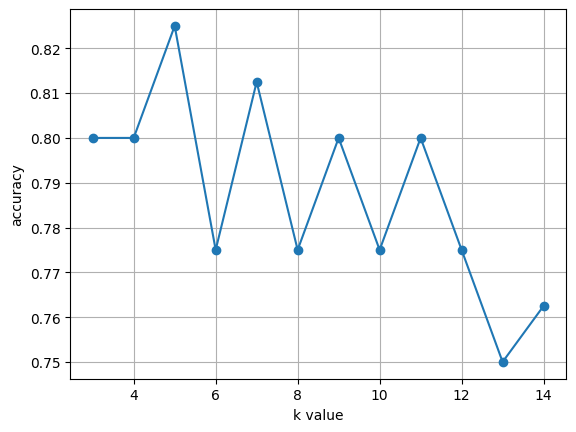

In [ ]:
plt.plot(neighbors,metric_K,'o-')
plt.xlabel('k value')
plt.ylabel('accuracy')
plt.grid()


In [ ]:
Classifier = KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)
Classifier.fit(x_train,y_train)
y_pred_knn = Classifier.predict(x_test)

print('accuracy is',accuracy_score(y_test,y_pred_knn))
print('precision is',precision_score(y_test,y_pred_knn))
print('recall is',recall_score(y_test,y_pred_knn))
print('F1 is',f1_score(y_test,y_pred_knn))
confusion_matrix(y_test,y_pred_knn)


accuracy is 0.825
precision is 0.7692307692307693
recall is 0.7142857142857143
F1 is 0.7407407407407407


array([[46,  6],
       [ 8, 20]])

In [ ]:
iris1= sns.load_dataset("iris")

In [ ]:
iris1

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [ ]:
X = iris.drop(['User ID','Purchased'],axis=1)
Y = iris1['species']